## Preparing the environment

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import jupyter_black

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

%load_ext jupyter_black

## Data preparation and data cleaning

In [2]:
# %load_ext jupyter_black

# Importing a dataset and creating a DataFrame
data = pd.read_csv(
    "https://raw.githubusercontent.com/adamfdnb/course-mlzoomcamp2023/main/Midterm%20project/dataset/milknew.csv"
)
df_init = data.copy()

In [3]:
# View the shape of the dataset
display(df_init.shape)

# View the first and last five rows  of the dataset
display(df_init.head())
display(df_init.tail())

(1059, 8)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [4]:
# Converting string columns to lowercase and replacing spaces with underscores
df_init.columns = df_init.columns.str.replace(" ", "_").str.lower()
string_columns = list(df_init.dtypes[df_init.dtypes == "object"].index)

for col in string_columns:
    df_init[col] = df_init[col].str.lower().str.replace(" ", "_")

In [5]:
df_init.columns

Index(['ph', 'temprature', 'taste', 'odor', 'fat', 'turbidity', 'colour',
       'grade'],
      dtype='object')

In [6]:
# Rename a column in the DataFrame
df_init.rename(columns={"temprature": "temperature"}, inplace=True)

In [7]:
# Analysis of missing values in each column of DataFrame 'df'
df_init.isnull().sum()

ph             0
temperature    0
taste          0
odor           0
fat            0
turbidity      0
colour         0
grade          0
dtype: int64

## EDA, feature importance analysis

In [8]:
# Infomation of the dataset
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ph           1059 non-null   float64
 1   temperature  1059 non-null   int64  
 2   taste        1059 non-null   int64  
 3   odor         1059 non-null   int64  
 4   fat          1059 non-null   int64  
 5   turbidity    1059 non-null   int64  
 6   colour       1059 non-null   int64  
 7   grade        1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


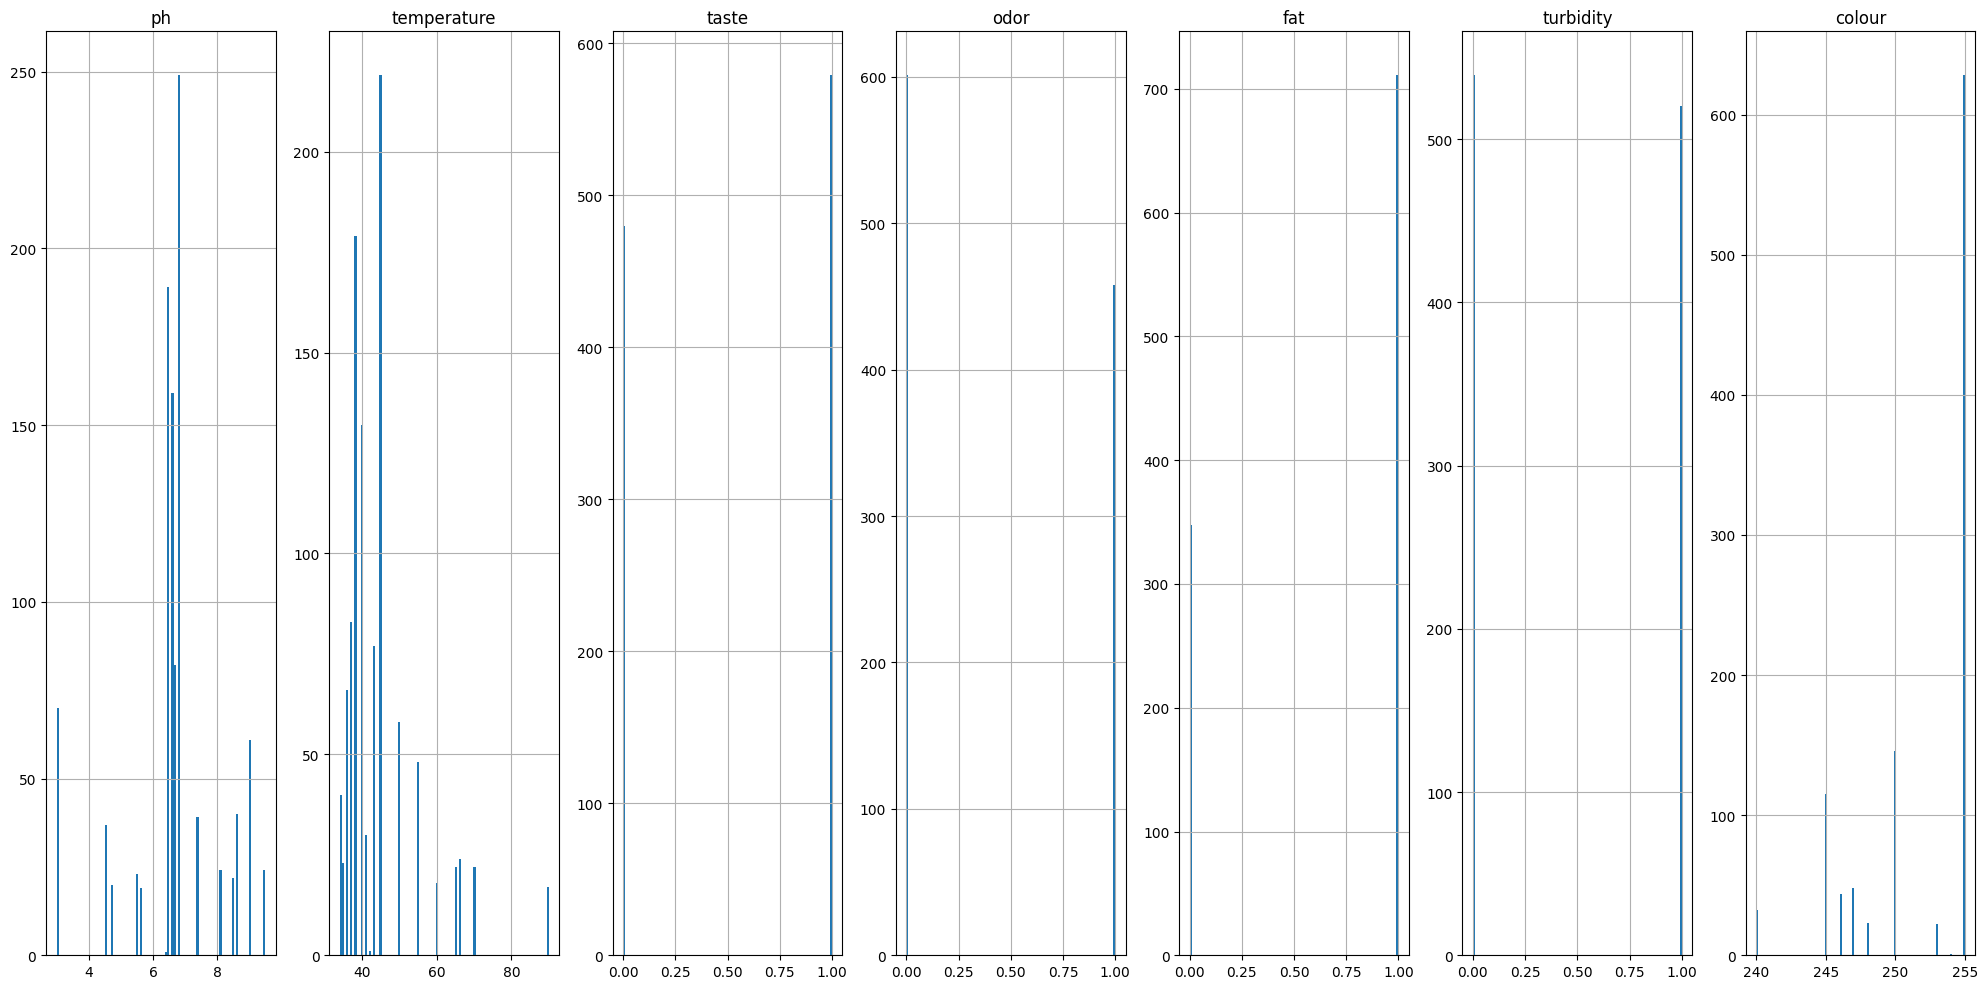

In [9]:
# Create histograms for multiple columns

columns_to_plot = ["ph", "temperature", "taste", "odor", "fat", "turbidity", "colour"]

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 10))
axes = axes.ravel()

for i, column in enumerate(columns_to_plot):
    df_init[column].hist(bins=100, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [10]:
# Extract unique values from the "grade" column of the DataFrame 'df'.
df_init.grade.unique()

array(['high', 'low', 'medium'], dtype=object)

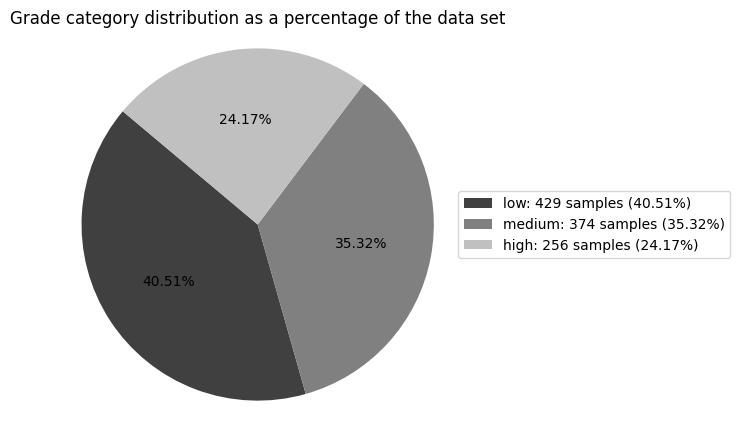

In [11]:
# Calculate the percentage distribution of categories
percentage_distribution = df_init.grade.value_counts(normalize=True)
total_counts = df_init.grade.count()

# Define a grayscale color palette
gray_palette = sns.color_palette("gray", len(percentage_distribution))

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    percentage_distribution,
    labels=None,
    autopct="%1.2f%%",
    startangle=140,
    colors=gray_palette,
)
plt.axis("equal")
plt.title("Grade category distribution as a percentage of the data set")

# Add a legend beside the chart
legend_labels = [
    f"{grade}: {pct*total_counts:.0f} samples ({pct*100:.2f}%)"
    for grade, pct in percentage_distribution.items()
]
plt.legend(legend_labels, title=None, loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

In [12]:
# Summary statistics for the initial dataset and transpose the result
df_init.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,1059.0,6.630123,1.399679,3.0,6.5,6.7,6.8,9.5
temperature,1059.0,44.226629,10.098364,34.0,38.0,41.0,45.0,90.0
taste,1059.0,0.546742,0.498046,0.0,0.0,1.0,1.0,1.0
odor,1059.0,0.432483,0.495655,0.0,0.0,0.0,1.0,1.0
fat,1059.0,0.671388,0.469930,0.0,0.0,1.0,1.0,1.0
turbidity,1059.0,0.491029,0.500156,0.0,0.0,0.0,1.0,1.0
colour,1059.0,251.840415,4.307424,240.0,250.0,255.0,255.0,255.0


In [13]:
# Create
df = df_init.copy()

In [14]:
# Replace values in the "grade" column of DataFrame 'df' based on certain conditions.

df.loc[df["grade"] == "high", "grade"] = 2
df.loc[df["grade"] == "medium", "grade"] = 1
df.loc[df["grade"] == "low", "grade"] = 0

df["grade"] = df["grade"].astype(str).astype(int)
df.head()

,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ph           1059 non-null   float64
 1   temperature  1059 non-null   int64  
 2   taste        1059 non-null   int64  
 3   odor         1059 non-null   int64  
 4   fat          1059 non-null   int64  
 5   turbidity    1059 non-null   int64  
 6   colour       1059 non-null   int64  
 7   grade        1059 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 66.3 KB


In [16]:
# Summary statistics for the dataset and transpose the result
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,1059.0,6.630123,1.399679,3.0,6.5,6.7,6.8,9.5
temperature,1059.0,44.226629,10.098364,34.0,38.0,41.0,45.0,90.0
taste,1059.0,0.546742,0.498046,0.0,0.0,1.0,1.0,1.0
odor,1059.0,0.432483,0.495655,0.0,0.0,0.0,1.0,1.0
fat,1059.0,0.671388,0.469930,0.0,0.0,1.0,1.0,1.0
turbidity,1059.0,0.491029,0.500156,0.0,0.0,0.0,1.0,1.0
colour,1059.0,251.840415,4.307424,240.0,250.0,255.0,255.0,255.0
grade,1059.0,0.836638,0.787868,0.0,0.0,1.0,1.0,2.0


In [17]:
# Create a list of column names containing numerical data types (int64 and float64)
# from the DataFrame.
numeric_columns = df.select_dtypes(include=["float64", "int64"])

# Display List of numerical columns
list(numeric_columns)

['ph', 'temperature', 'taste', 'odor', 'fat', 'turbidity', 'colour', 'grade']

In [18]:
# Calculating the correlation matrix
corr_df = numeric_columns.corr()
corr_df

,ph,temperature,taste,odor,fat,turbidity,colour,grade
ph,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565,0.028980
temperature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511,-0.417789
taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654,0.025500
odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361,0.149626
fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151,0.151002
turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436,-0.153634
colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000,-0.056986
grade,0.028980,-0.417789,0.025500,0.149626,0.151002,-0.153634,-0.056986,1.000000


odor         0.457935
turbidity    0.457935
fat          0.329264
taste        0.324149
dtype: float64

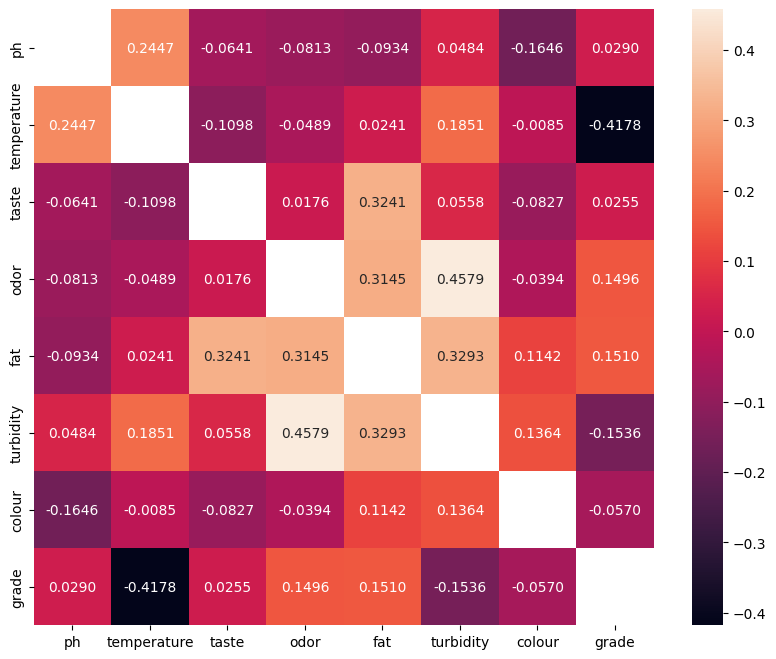

In [19]:
# Calculating the correlation matrix and finding the highest correlation
corr_matrix_df = numeric_columns.corr()[numeric_columns.corr() != 1]
max_corr = corr_matrix_df.max().max()
row, col = (corr_matrix_df == max_corr).stack().idxmax()

# Displaying the top 4 highest correlations
display(corr_matrix_df.max().sort_values(ascending=False).head(4))

# Creating a heatmap to visualize correlations
fig = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix_df, annot=True, fmt=".4f")

In [20]:
# # Map categories in the "Grade" column to numerical values
# grade_mapping = {'low': 3, 'medium': 2, 'high': 1}
# df['grade'] = df['grade'].map(grade_mapping)

# Perform one-hot encoding for the "grade" column
df_with_dummies = pd.get_dummies(df, columns=["grade"], drop_first=False)

# Calculate the correlation matrix
correlation_matrix = df_with_dummies.corr()

In [21]:
df_with_dummies.columns

Index(['ph', 'temperature', 'taste', 'odor', 'fat', 'turbidity', 'colour',
       'grade_0', 'grade_1', 'grade_2'],
      dtype='object')

In [22]:
# Create a dictionary to map old category names to new category names
column_mapping = {"grade_2": "high", "grade_1": "medium", "grade_0": "low"}

# Use the 'rename' function to change column names
df_with_dummies = df_with_dummies.rename(columns=column_mapping)

In [23]:
df_with_dummies.columns

Index(['ph', 'temperature', 'taste', 'odor', 'fat', 'turbidity', 'colour',
       'low', 'medium', 'high'],
      dtype='object')

temperature    0.495631
low            0.495631
turbidity      0.457935
odor           0.457935
dtype: float64

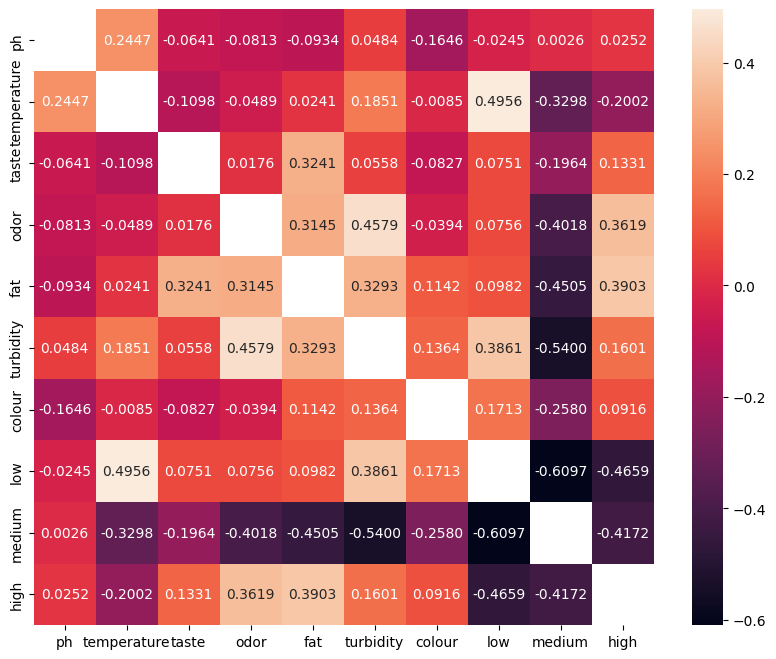

In [24]:
# Calculating the correlation matrix and finding the highest correlation before maping grade column
corr_matrix_df = df_with_dummies.corr()[df_with_dummies.corr() != 1]
max_corr = corr_matrix_df.max().max()
row, col = (corr_matrix_df == max_corr).stack().idxmax()

# Displaying the top 4 highest correlations
display(corr_matrix_df.max().sort_values(ascending=False).head(4))

# Creating a heatmap to visualize correlations
fig = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix_df, annot=True, fmt=".4f")

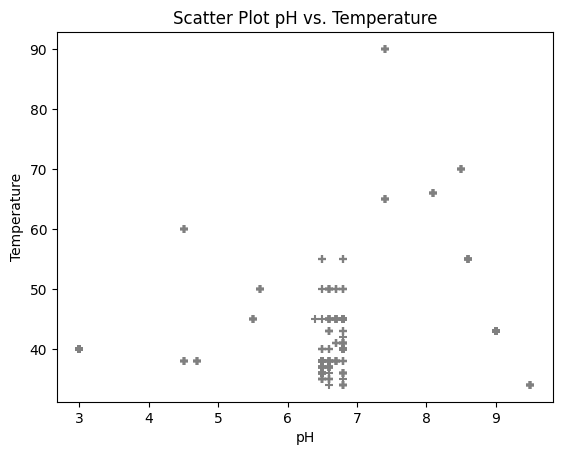

In [25]:
# The chart helps as a first approximation to understand
# if there are any apparent relationships between pH and temperature.
plt.scatter(df["ph"], df["temperature"], c="gray", cmap="gray", marker="+")
plt.xlabel("pH")
plt.ylabel("Temperature")
plt.title("Scatter Plot pH vs. Temperature")
plt.show()

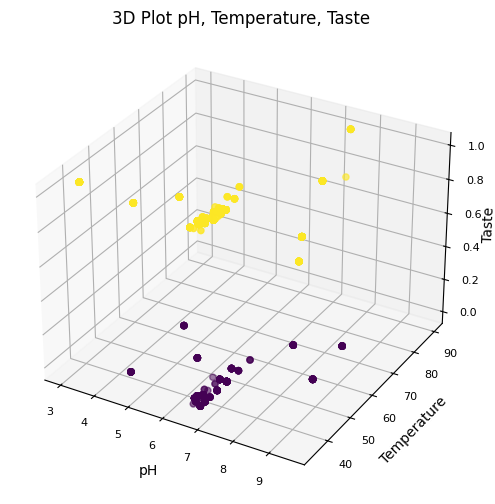

In [26]:
# Analyse the relationships between the three variables in 3D space
# to better understand their interrelationships

# Initialize a 3D Figure and Axis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

# Create a 3D Plot
ax.scatter(df["ph"], df["temperature"], df["taste"], c=df["taste"], cmap="viridis")

# Add Axis Labels
ax.set_xlabel("pH")
ax.set_ylabel("Temperature")
ax.set_zlabel("Taste")

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

fontdict = {"fontsize": 8}
rounded_zticks = [round(label, 1) for label in ax.get_zticks()]

ax.set_zticklabels(rounded_zticks, fontdict=fontdict)

ax.zaxis.set_rotate_label(True)
ax.zaxis.labelpad = -2

plt.title("3D Plot pH, Temperature, Taste")
plt.show()

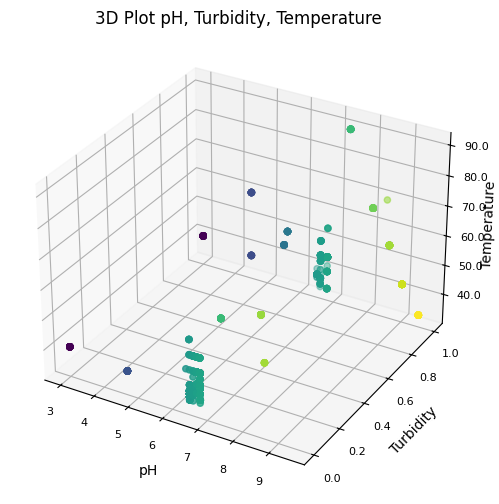

In [27]:
# Analyse the relationships between the three variables in 3D space
# to better understand their interrelationships

# Initialize a 3D Figure and Axis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

# Create a 3D Plot
scatter = ax.scatter(
    df["ph"], df["turbidity"], df["temperature"], c=df["ph"], cmap="viridis"
)

# Add Axis Labels
ax.set_xlabel("pH")
ax.set_ylabel("Turbidity")
ax.set_zlabel("Temperature")

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

fontdict = {"fontsize": 8}
rounded_zticks = [round(label, 1) for label in ax.get_zticks()]

ax.set_zticklabels(rounded_zticks, fontdict=fontdict)

ax.zaxis.set_rotate_label(True)
ax.zaxis.labelpad = -2

legend_labels = {grade: color for grade, color in zip(df["grade"], scatter.get_array())}
legend_handles = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor=color,
        markersize=10,
        label=grade,
    )
    for grade, color in legend_labels.items()
]

plt.title("3D Plot pH, Turbidity, Temperature ")
plt.show()

In [28]:
# Group the DataFrame by categories 'high', 'medium', and 'low',
# and calculate the mean values of 'taste', 'odor', and 'temperature' within each group
grouped = df_with_dummies.groupby(["high", "medium", "low"])[
    ["taste", "odor", "temperature"]
].mean()

print(grouped)

                       taste      odor  temperature
high  medium low                                   
False False  True   0.592075  0.477855    50.289044
      True   False  0.414439  0.163102    39.721925
True  False  False  0.664062  0.750000    40.648438


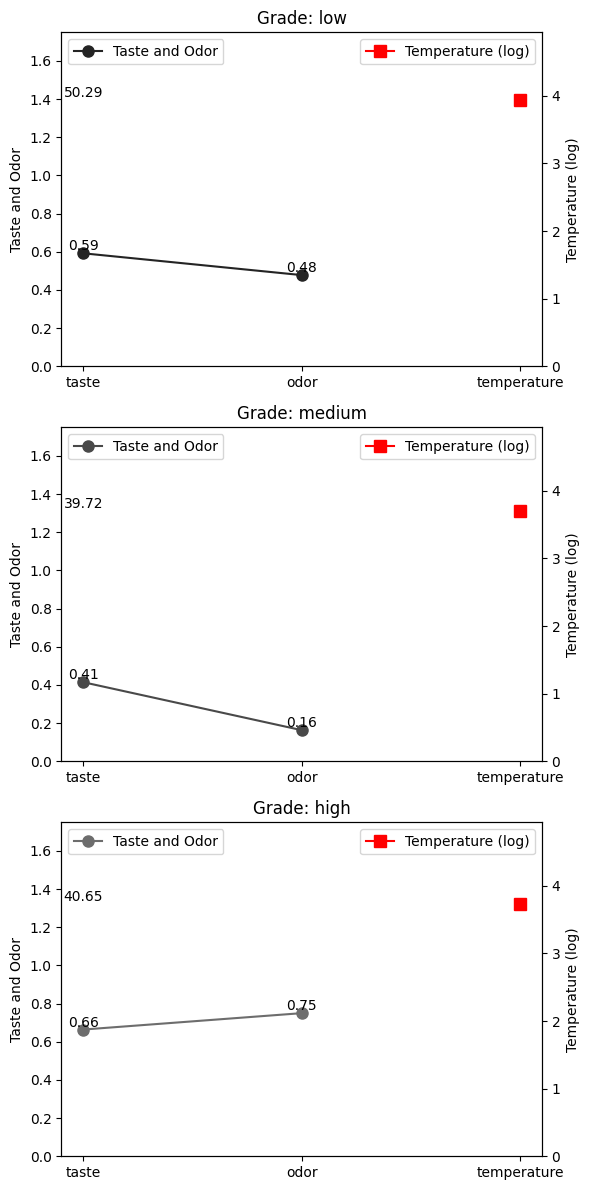

In [29]:
# Define a grayscale color palette
gray_palette = sns.color_palette("gray")

# Data for the plots
grades = ["low", "medium", "high"]  # Define the grades

# Assuming taste_values, odor_values, and temperature_values are pandas Series
taste_values = grouped["taste"]
odor_values = grouped["odor"]
temperature_values = grouped["temperature"]

# X-axis indices
x = range(len(grades))

# Width of the plots
fig, axes = plt.subplots(len(grades), 1, figsize=(6, 12))

# Create a separate plot for each "Grade" category
for i, grade in enumerate(grades):
    ax = axes[i]

    # Logarithmize temperature values using np.log1p
    log_temperature_values = [np.log1p(value) for value in temperature_values]

    # Create a scatter plot
    ax.plot(
        ["taste", "odor"],
        [taste_values.iloc[i], odor_values.iloc[i]],
        marker="o",
        linestyle="-",
        label="Taste and Odor",
        markersize=8,
        color=gray_palette[i],
    )

    # Second Y-axis for log-transformed temperature values
    ax2 = ax.twinx()
    ax2.plot(
        ["temperature"],
        [log_temperature_values[i]],
        marker="s",
        linestyle="-",
        label="Temperature (log)",
        markersize=8,
        color="red",
    )

    # Set the plot title
    ax.set_title(f"Grade: {grade}")
    max_value = max(taste_values.max(), odor_values.max())
    ax.set_ylim(0, max_value + 1)
    ax.set_ylabel("Taste and Odor")
    ax2.set_ylim(0, max(log_temperature_values) + 1)
    ax2.set_ylabel("Temperature (log)")

    # Add labels to the data points on the plot
    for j, val in enumerate([taste_values.iloc[i], odor_values.iloc[i]]):
        ax.text(j, val, f"{val:.2f}", ha="center", va="bottom", fontsize=10)
    ax2.text(
        0,
        log_temperature_values[i],
        f"{temperature_values.iloc[i]:.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")

# Display the plots stacked one below the other
plt.tight_layout()
plt.show()

<Axes: xlabel='taste', ylabel='temperature'>

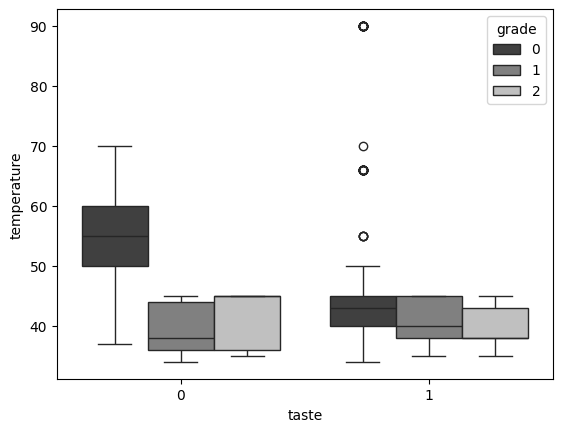

In [30]:
# Create a boxplot using Seaborn to visualize data relationships.
gray_palette = sns.color_palette("gray", n_colors=3)
sns.boxplot(x="taste", y="temperature", hue="grade", data=df, palette=gray_palette)

<Axes: xlabel='odor', ylabel='temperature'>

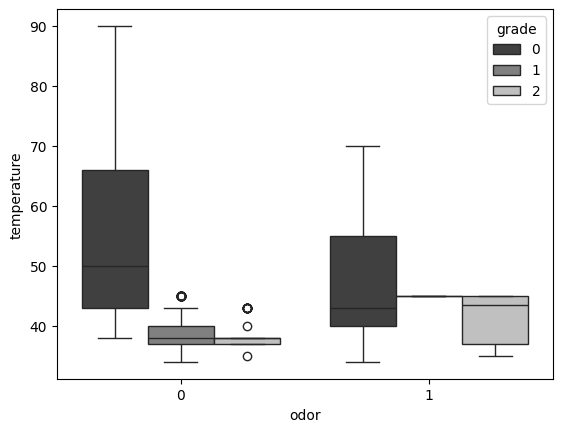

In [31]:
sns.boxplot(x="odor", y="temperature", hue="grade", data=df, palette=gray_palette)

<Axes: xlabel='odor', ylabel='colour'>

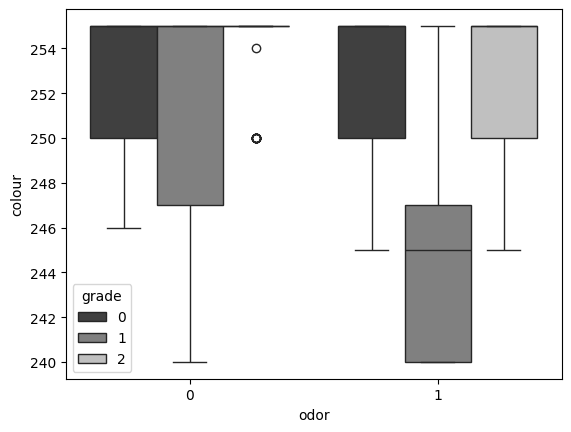

In [32]:
sns.boxplot(x="odor", y="colour", hue="grade", data=df, palette=gray_palette)

<Axes: xlabel='turbidity', ylabel='temperature'>

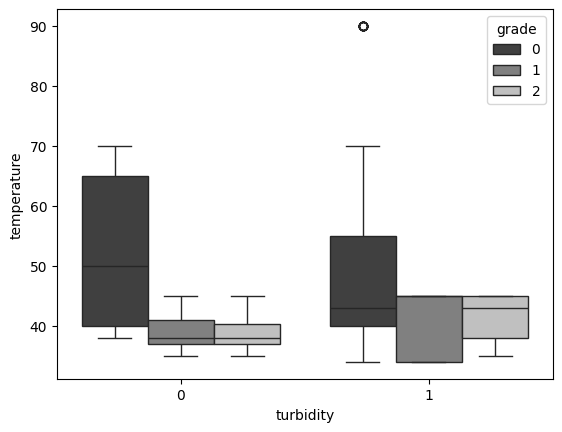

In [33]:
sns.boxplot(x="turbidity", y="temperature", hue="grade", data=df, palette=gray_palette)

<Axes: xlabel='turbidity', ylabel='colour'>

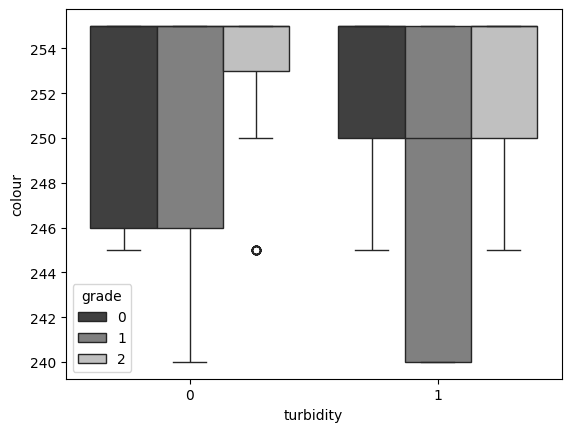

In [34]:
sns.boxplot(x="turbidity", y="colour", hue="grade", data=df, palette=gray_palette)

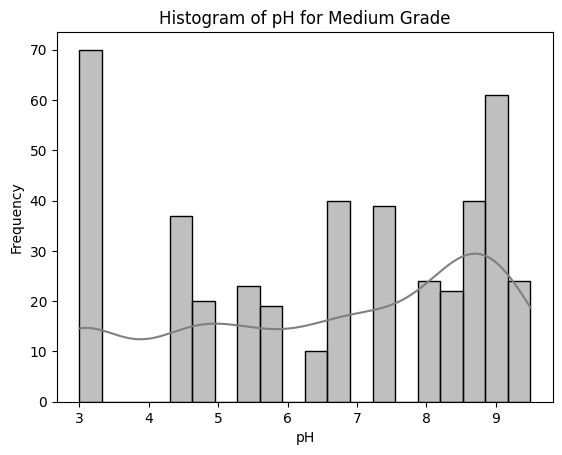

In [35]:
low_ph_values = df[df["grade"] == 0]["ph"]

sns.histplot(low_ph_values, bins=20, kde=True, color="grey")
plt.title("Histogram of pH for Medium Grade")
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.show()

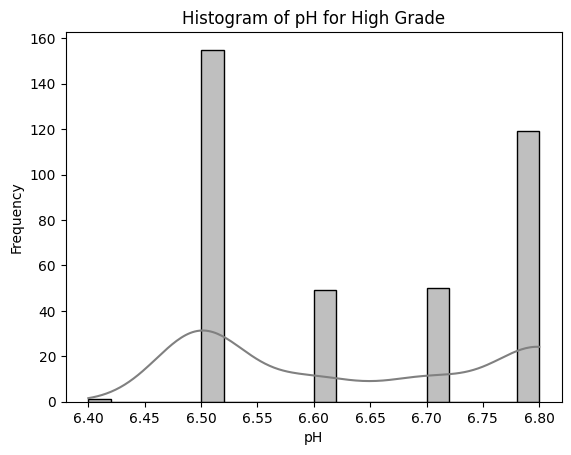

In [36]:
medium_ph_values = df[df["grade"] == 1]["ph"]

sns.histplot(medium_ph_values, bins=20, kde=True, color="grey")
plt.title("Histogram of pH for High Grade")
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.show()

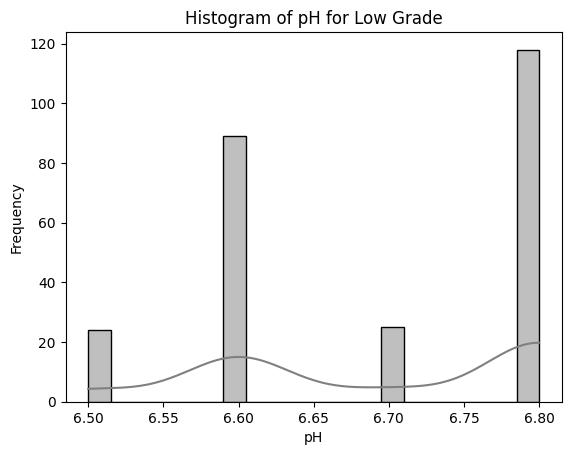

In [37]:
high_ph_values = df[df["grade"] == 2]["ph"]

sns.histplot(high_ph_values, bins=20, kde=True, color="grey")
plt.title("Histogram of pH for Low Grade")
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.show()

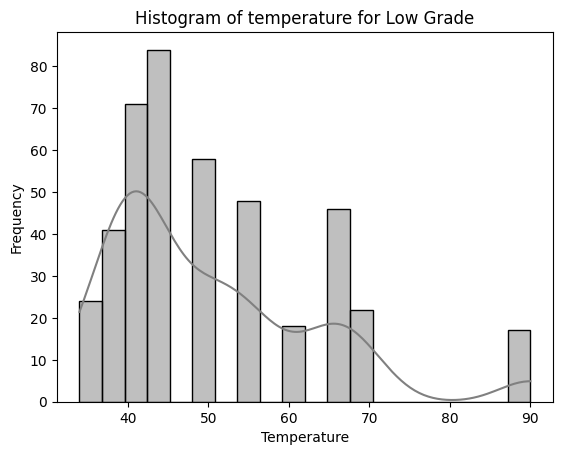

In [38]:
low_temprature_values = df[df["grade"] == 0]["temperature"]

sns.histplot(low_temprature_values, bins=20, kde=True, color="grey")
plt.title("Histogram of temperature for Low Grade")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

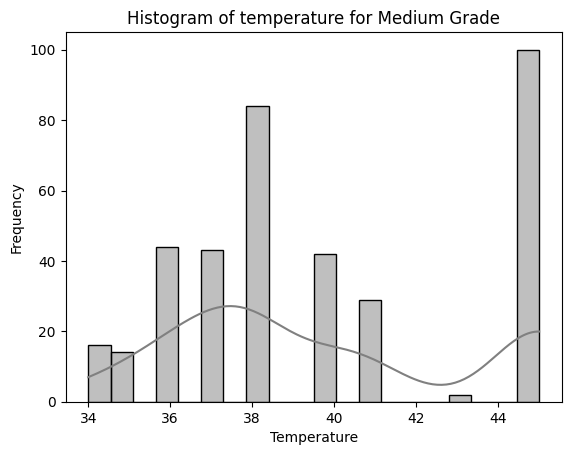

In [39]:
medium_temprature_values = df[df["grade"] == 1]["temperature"]

sns.histplot(medium_temprature_values, bins=20, kde=True, color="grey")
plt.title("Histogram of temperature for Medium Grade")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

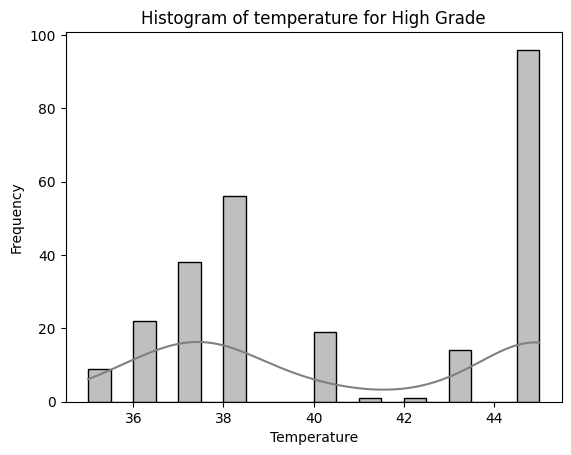

In [40]:
high_temprature_values = df[df["grade"] == 2]["temperature"]

sns.histplot(high_temprature_values, bins=20, kde=True, color="grey")
plt.title("Histogram of temperature for High Grade")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

## Modelling
Installed necessary packages

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction import DictVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [42]:
# Splitting the DataFrame 'df' into three subsets: training, validation, and testing.
(
    df_full_train,
    df_test,
) = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

# Displaying the sizes of different data sets
n = len(df)
n_full_train = len(df_full_train)
n_train = len(df_train)
n_val = len(df_val)
n_test = len(df_test)

print(f"n_dataset = \t\t{n}")
# print(f"n_full_train = \t\t{n_full_train}")
print(f"n_train = \t\t{n_train}\t{(n_train / n) * 100:.0f}%")
print(f"n_val = \t\t{n_val}\t{(n_val / n) * 100:.0f}%")
print(f"n_test = \t\t{n_test}\t{(n_test / n) * 100:.0f}%")
print(f"check of sum:\n(train + val + test) = \t{n_train + n_val + n_test}")

n_dataset = 		1059
n_train = 		635	60%
n_val = 		212	20%
n_test = 		212	20%
check of sum:
(train + val + test) = 	1059


In [43]:
y_train = df_train["grade"]
y_val = df_val["grade"]
y_test = df_test["grade"]

del df_train["grade"]
del df_val["grade"]
del df_test["grade"]

In [44]:
# preparation of features_matrices:
X_train = df_train
X_val = df_val
X_test = df_test


# X_train.shape()
X_train[0:3]

,ph,temperature,taste,odor,fat,turbidity,colour
541,6.6,38,0,0,0,0,255
163,6.8,50,0,0,1,0,255
357,4.5,38,0,1,1,1,255


In [45]:
df.iloc[1]

ph               6.6
temperature     36.0
taste            0.0
odor             1.0
fat              0.0
turbidity        1.0
colour         253.0
grade            2.0
Name: 1, dtype: float64

In [46]:
#  Użyj modelu do dokonania predykcji
pred_data = X_test[0:5]

In [47]:
pred_data

,ph,temperature,taste,odor,fat,turbidity,colour
215,6.5,38,1,0,1,0,255
663,3.0,40,1,1,1,1,255
773,6.8,45,0,1,1,1,255
798,4.7,38,1,0,1,0,255
629,6.7,38,1,0,1,0,255


##  Logistic Regression

In [48]:
# train LogisticRegression model:
model_lr = LogisticRegression(solver="liblinear", C=1.0, max_iter=100, random_state=42)
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [49]:
# perform predictions on the test dataset:
y_pred = model_lr.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 0, 0, 1, 1,
       2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1,
       2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0,
       1, 0, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0])

In [50]:
model_lr.score(X_train, y_train)

0.7559055118110236

In [51]:
model_lr.score(X_test, y_test)

0.7547169811320755

In [52]:
predicted_grade = model_lr.predict(pred_data)

# display the prediction result
print(f"Predicted Grade: \t\t {predicted_grade}")

first_five_expectations = y_test[0:5].values.tolist()
print(f"\nThe first five expectations:\t {first_five_expectations}")

Predicted Grade: 		 [1 0 2 1 1]

The first five expectations:	 [1, 0, 2, 0, 2]


In [53]:
# calculation of accuracy:
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test dataset:  {test_accuracy:.5f}")

Accuracy on the test dataset:  0.75472


## Decision Tree Classifier

Best max_depth: 8
Lowest RMSE value: 0.0


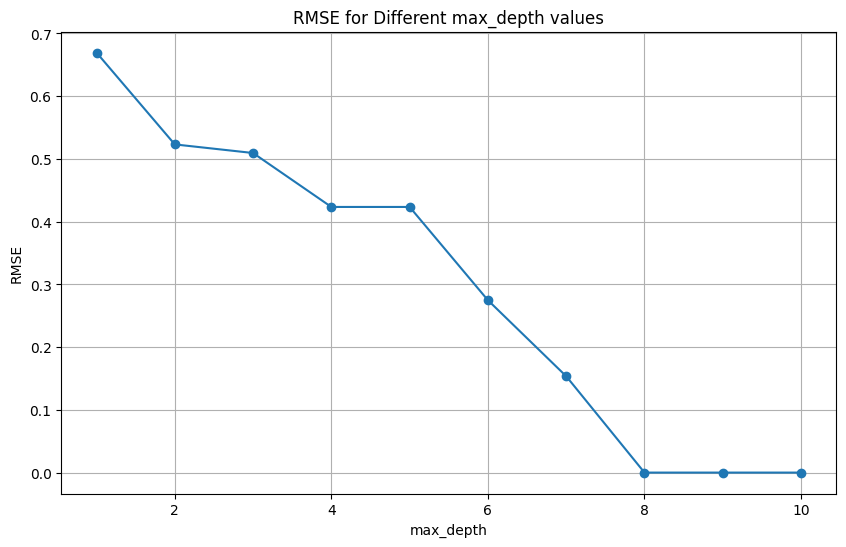

In [54]:
# List of max_depth values to test
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Initialize a list to store RMSE values for each max_depth
rmse_values = []

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Create and train a DecisionTreeClassifier model
    model_dtc = DecisionTreeClassifier(max_depth=max_depth, random_state=1)
    model_dtc.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = model_dtc.predict(X_test)

    # Calculate RMSE for the predictions
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store RMSE for the current max_depth
    rmse_values.append(rmse)

# Create a DataFrame to store the results
results_df = pd.DataFrame(rmse_values, columns=["RMSE"], index=max_depth_values)

# Find the best max_depth based on the lowest RMSE
best_max_depth = results_df["RMSE"].idxmin()

# Print the best max_depth and the corresponding RMSE
print(f"Best max_depth: {best_max_depth}")
print(f"Lowest RMSE value: {results_df['RMSE'].min()}")

# Generate a plot
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, rmse_values, marker="o")
plt.xlabel("max_depth")
plt.ylabel("RMSE")
plt.title("RMSE for Different max_depth values")
plt.grid(True)
plt.show()

In [55]:
# train DecisionTreeClassifier model:
model_dtc = DecisionTreeClassifier(max_depth=8)
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [56]:
y_pred = model_dtc.predict(X_test)
y_pred

array([1, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1,
       2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 0, 1, 1,
       2, 1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 2,
       0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0,
       0, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2,
       2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0])

In [57]:
predicted_grade = model_dtc.predict(pred_data)

# Display the prediction result
first_five_expectations = y_test[0:5].values.tolist()
print(f"\nThe first five expectations:\t {first_five_expectations}")


The first five expectations:	 [1, 0, 2, 0, 2]


In [58]:
model_dtc.score(X_test, y_test)

1.0

In [59]:
model_dtc.score(X_val, y_val)

0.9952830188679245

In [60]:
# calculation of accuracy:
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test dataset:  {test_accuracy:.5f}")

Accuracy on the test dataset:  1.00000


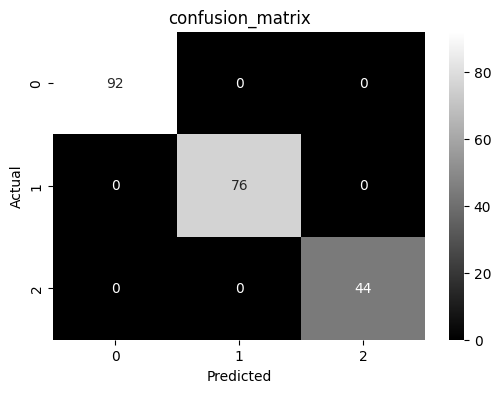

In [61]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="grey")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion_matrix")
plt.show()

[Text(0.4642857142857143, 0.9444444444444444, 'x[0] <= 7.1\ngini = 0.653\nsamples = 635\nvalue = [254, 229, 152]'),
 Text(0.39285714285714285, 0.8333333333333334, 'x[0] <= 6.05\ngini = 0.641\nsamples = 500\nvalue = [119, 229, 152]'),
 Text(0.32142857142857145, 0.7222222222222222, 'gini = 0.0\nsamples = 90\nvalue = [90, 0, 0]'),
 Text(0.4642857142857143, 0.7222222222222222, 'x[3] <= 0.5\ngini = 0.546\nsamples = 410\nvalue = [29, 229, 152]'),
 Text(0.21428571428571427, 0.6111111111111112, 'x[1] <= 47.5\ngini = 0.372\nsamples = 246\nvalue = [24, 191, 31]'),
 Text(0.14285714285714285, 0.5, 'x[2] <= 0.5\ngini = 0.24\nsamples = 222\nvalue = [0, 191, 31]'),
 Text(0.07142857142857142, 0.3888888888888889, 'gini = 0.0\nsamples = 121\nvalue = [0, 121, 0]'),
 Text(0.21428571428571427, 0.3888888888888889, 'x[0] <= 6.55\ngini = 0.425\nsamples = 101\nvalue = [0, 70, 31]'),
 Text(0.14285714285714285, 0.2777777777777778, 'gini = 0.0\nsamples = 44\nvalue = [0, 44, 0]'),
 Text(0.2857142857142857, 0.27777

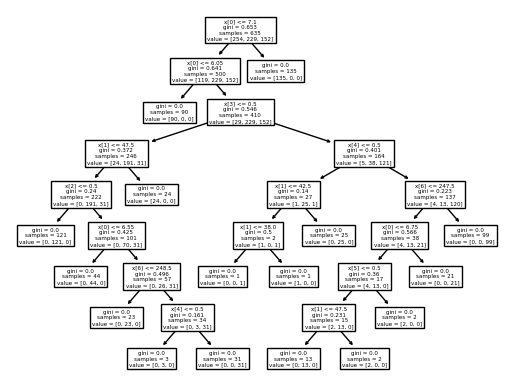

In [62]:
tree.plot_tree(model_dtc)

## Random Forest Classifier

max_depth=1:   0%|          | 0/14 [00:00<?, ?it/s]

max_depth=2:   0%|          | 0/14 [00:00<?, ?it/s]

max_depth=3:   0%|          | 0/14 [00:00<?, ?it/s]

max_depth=4:   0%|          | 0/14 [00:00<?, ?it/s]

max_depth=5:   0%|          | 0/14 [00:00<?, ?it/s]

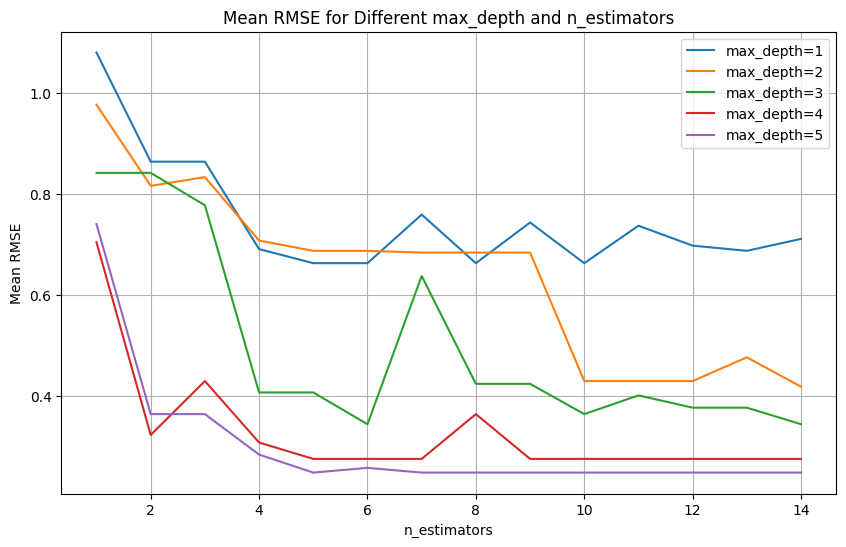

Lowest RMSE value: 0.2476302782718243
Corresponding to it max_depth i n_estimators: (5, 5)


In [63]:
# List of max_depth values to test
max_depth_values = [
    1,
    2,
    3,
    4,
    5,
]

# Range of n_estimators values to test
n_est_values = list(range(1, 15, 1))

# Initialize a list to store mean RMSE results
mean_rmse_values = []

# Iterate over different max_depth values
for max_depth in max_depth_values:
    rmse_values = []

    # Iterate over different n_estimators values
    for n in tqdm(n_est_values, desc=f"max_depth={max_depth}"):
        rmse_scores = []

        # Create and train a RandomForestRegressor model
        model_rfc = RandomForestClassifier(
            n_estimators=n, max_depth=max_depth, random_state=1, n_jobs=-1
        )
        model_rfc.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model_rfc.predict(X_test)

        # Calculate RMSE for the predictions
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

        # Calculate the mean RMSE for the given max_depth and n_estimators combination
        mean_rmse = np.mean(rmse_scores)
        rmse_values.append(mean_rmse)

    # Add the RMSE results to the list of mean RMSE values
    mean_rmse_values.append(rmse_values)

# Find the best max_depth based on mean RMSE
best_max_depth = min(mean_rmse_values, key=lambda x: x[2])[0]

results_df = pd.DataFrame(
    mean_rmse_values, columns=n_est_values, index=max_depth_values
)

# Generate a plot
plt.figure(figsize=(10, 6))
for i, max_depth in enumerate(max_depth_values):
    plt.plot(n_est_values, mean_rmse_values[i], label=f"max_depth={max_depth}")
plt.xlabel("n_estimators")
plt.ylabel("Mean RMSE")
plt.legend()
plt.title("Mean RMSE for Different max_depth and n_estimators")
plt.grid(True)
plt.show()

min_rmse = results_df.min().min()
min_rmse_idx = results_df.stack().idxmin()

print(f"Lowest RMSE value: {min_rmse}")
print(f"Corresponding to it max_depth i n_estimators: {min_rmse_idx}")

In [64]:
# train RandomForestClassifier model:
model_rfc = RandomForestClassifier(n_estimators=5, max_depth=5)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=5)

In [65]:
y_pred = model_rfc.predict(X_test)
y_pred

array([1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1,
       2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1,
       2, 1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0,
       0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2,
       2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0])

In [66]:
predicted_grade = model_rfc.predict(pred_data)

# Display the prediction result
print(f"Predicted Grade: \t\t {predicted_grade}")

first_five_expectations = y_test[0:5].values.tolist()
print(f"\nThe first five expectations:\t {first_five_expectations}")

Predicted Grade: 		 [1 0 2 0 1]

The first five expectations:	 [1, 0, 2, 0, 2]


In [67]:
model_rfc.score(X_test, y_test)

0.9386792452830188

In [68]:
model_rfc.score(X_train, y_train)

0.9574803149606299

In [69]:
model_rfc.score(X_val, y_val)

0.9198113207547169

In [70]:
# calculation of accuracy:
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test dataset:  {test_accuracy:.5f}")

Accuracy on the test dataset:  0.93868


In [71]:
r2_score = r2_score(y_test, y_pred)
print(f"R2 on the test dataset:  {r2_score:.5f}")

R2 on the test dataset:  0.89611


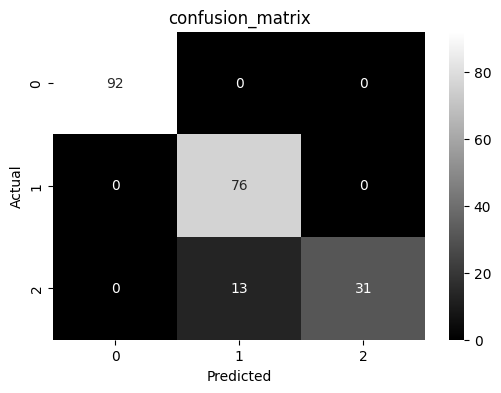

In [72]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="grey")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion_matrix")
plt.show()

## K-Nearest Neighbors Classifier

Best n_neighbors: 1
Lowest RMSE value: 0.09712858623572641


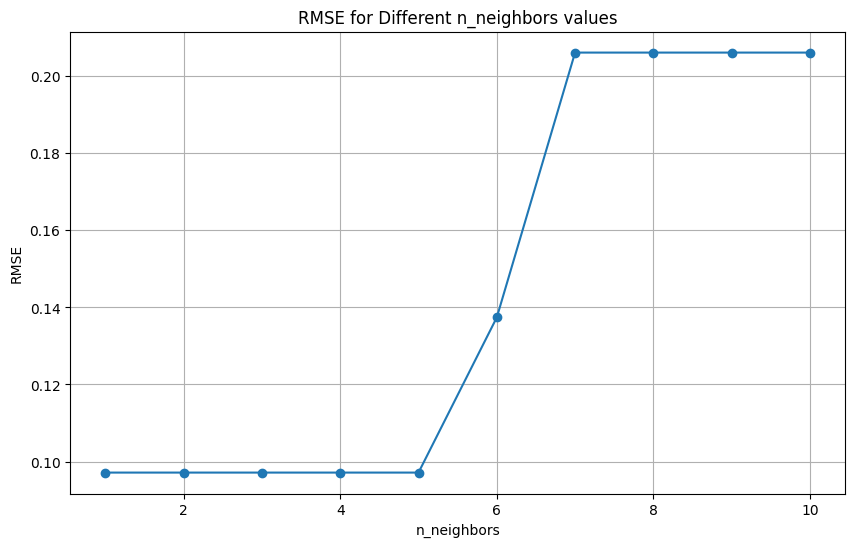

In [73]:
# List of n_neighbors values to test
n_neighbors_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Initialize a list to store RMSE values for each n_neighbors
rmse_values = []

# Iterate over different n_neighbors values
for n_neighbors in n_neighbors_values:
    # Create and train a KNeighborsClassifier model
    model_KNnc = KNeighborsClassifier(n_neighbors=n_neighbors)
    model_KNnc.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = model_KNnc.predict(X_test)

    # Calculate RMSE for the predictions
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store RMSE for the current n_neighbors
    rmse_values.append(rmse)

# Create a DataFrame to store the results
results_df = pd.DataFrame(rmse_values, columns=["RMSE"], index=n_neighbors_values)

# Find the best n_neighbors based on the lowest RMSE
best_n_neighbors = results_df["RMSE"].idxmin()

# Print the best n_neighbors and the corresponding RMSE
print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Lowest RMSE value: {results_df['RMSE'].min()}")

# Generate a plot
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, rmse_values, marker="o")
plt.xlabel("n_neighbors")
plt.ylabel("RMSE")
plt.title("RMSE for Different n_neighbors values")
plt.grid(True)
plt.show()

In [74]:
# train KNeighborsClassifier model:
model_KNnc = KNeighborsClassifier(n_neighbors=1)
model_KNnc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [75]:
y_pred = model_KNnc.predict(X_test)
y_pred

array([1, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 1, 1,
       2, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 0, 1, 1,
       2, 1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 2,
       0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0,
       0, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2,
       2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0])

In [76]:
predicted_grade = model_KNnc.predict(pred_data)

# Display the prediction result
print(f"Predicted Grade: \t\t {predicted_grade}")

first_five_expectations = y_test[0:5].values.tolist()
print(f"\nThe first five expectations:\t {first_five_expectations}")

Predicted Grade: 		 [1 0 2 0 2]

The first five expectations:	 [1, 0, 2, 0, 2]


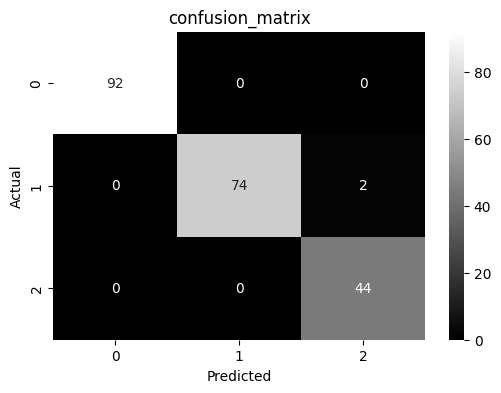

In [77]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="grey")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion_matrix")
plt.show()

In [78]:
model_KNnc.score(X_test, y_test)

0.9905660377358491

In [79]:
model_KNnc.score(X_val, y_val)

0.9952830188679245

In [80]:
# calculation of accuracy:
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test dataset:  {test_accuracy:.5f}")

Accuracy on the test dataset:  0.99057


In [81]:
from sklearn.metrics import accuracy_score

# This code is used to evaluate and compare the accuracy of different
# machine learning models on a classification task.


# Sample models (Random Forest, Decision Tree, K-Nearest Neighbors, Logistic Regression)
models = [
    ("Random Forest", RandomForestClassifier(max_depth=5, n_estimators=5)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=8)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=1)),
    ("Logistic Regression", LogisticRegression(random_state=42, solver="liblinear")),
]

# Initialize lists to store accuracy for each model
accuracy_scores = []

for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict labels for the test dataset
    y_pred = model.predict(X_test)

    # Calculate accuracy for the model using the imported accuracy_score function
    accuracy = accuracy_score(y_test, y_pred)

    # Save the accuracy score
    accuracy_scores.append((model_name, accuracy))

# Display accuracy scores for each model
for model_name, accuracy_score in accuracy_scores:
    print(f"{model_name}: Accuracy = {accuracy_score:.2f}")

Random Forest: Accuracy = 0.91
Decision Tree: Accuracy = 1.00
K-Nearest Neighbors: Accuracy = 0.99
Logistic Regression: Accuracy = 0.75


In [82]:
# This code performs the process of training and evaluating several
# classification models using the F1-score metric on a test set.

# Used models (Random Forest, Decision Tree, K-Nearest Neighbors, Logistic Regression)
models = [
    ("Random Forest", RandomForestClassifier(max_depth=5, n_estimators=5)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=8)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=1)),
    ("Logistic Regression", LogisticRegression(random_state=42, solver="liblinear")),
]

# Initialize a list to store F1-score results
f1_scores = []

for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate F1-score for multiple classes
    f1 = f1_score(y_test, y_pred, average="weighted")

    f1_scores.append((model_name, f1))

# Display F1-score results for each model
for model_name, f1 in f1_scores:
    print(f"{model_name}: F1-score = {f1:.2f}")

Random Forest: F1-score = 0.91
Decision Tree: F1-score = 1.00
K-Nearest Neighbors: F1-score = 0.99
Logistic Regression: F1-score = 0.75


## Using model

In [83]:
# Use the model to make predictions
pred_data = X_val[50:55]
pred_data

,ph,temperature,taste,odor,fat,turbidity,colour
110,3.0,40,1,1,1,1,255
416,9.5,34,1,1,0,1,255
985,6.5,45,1,0,0,0,246
775,4.7,38,1,0,1,0,255
1058,8.6,55,0,1,1,1,255


In [84]:
# Make a prediction for milk quality using a RandomForestClassifier model

prediction_milk_quality = model_rfc.predict([[6.0, 38, 0, 1, 0, 1, 254]])

In [85]:
# Define milk quality labels
milk_quality_labels = ["Bad", "Moderate", "Good"]

# Iterate through the predictions for milk quality
for prediction in prediction_milk_quality:
    # Check if the prediction falls within the valid label indices
    if 0 <= prediction < len(milk_quality_labels):
        # Print the corresponding milk quality label based on the prediction
        print(f"The milk quality is '{milk_quality_labels[prediction]}'")
    else:
        # Handle cases where the prediction is outside the valid range
        print("Invalid milk quality prediction")

The milk quality is 'Bad'


## Save the model

In [86]:
import pickle
import os

In [87]:
output_file = f"model_mqp.pkl"

In [88]:
output_file

'model_mqp.pkl'

In [89]:
f_out = open(output_file, "wb")
pickle.dump(model_rfc, f_out)
f_out.close()

In [90]:
!ls -lh *.pkl

-rw-rw-r-- 1 adam adam 302 lis  6 22:08 dv.pkl
-rw-rw-r-- 1 adam adam 15K lis  8 22:11 model_mqp.pkl


In [91]:
# Get the full path to the saved file
output_filepath = os.path.abspath(output_file)

# Display the saved model's name and its full path
print(f"Saved the model as: {output_file}")
print(f"Full path to the saved model: {output_filepath}")

Saved the model as: model_mqp.pkl
Full path to the saved model: /home/adam/anaconda3/envs/mtp_mqp/milk_quality_prediction/model_mqp.pkl


In [92]:
with open(output_file, "wb") as f_out:
    pickle.dump(model_rfc, f_out)

## Load the model

In [1]:
import pickle

In [2]:
input_file = "model_mqp.pkl"

In [3]:
with open(input_file, "rb") as f_in:
    model = pickle.load(f_in)

In [4]:
model

RandomForestClassifier(max_depth=5, n_estimators=5)

## Test the model

In [5]:
import requests

In [6]:
url = "http://localhost:9696/predict"

In [7]:
milk_data = {
    "ph": 6.8,
    "temperature": 38,
    "taste": 0,
    "odor": 1,
    "fat": 0,
    "turbidity": 1,
    "colour": 254,
}

In [8]:
response = requests.post(url, json=milk_data).json()

In [9]:
response

{'milk_quality': 'Good'}